<a href="https://colab.research.google.com/github/chandra17iith/My_ML/blob/main/DecisionTrees%26RandomForest_Git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rainfall Prediction Using Decision Trees and Random Forest Classifiers

This project involves predicting whether it will rain tomorrow based on today's weather data. We use machine learning techniques, specifically **Decision Tree Classifier** and **Random Forest Classifier**, to build the models. The dataset used for this project is the **Australian Weather Dataset** from Kaggle.

## Table of Contents
- [Overview](#overview)
- [Dataset](#dataset)
- [Installation](#installation)
- [Model Training](#model-training)
  - [Data Preprocessing](#data-preprocessing)
  - [Decision Tree Classifier](#decision-tree-classifier)
  - [Random Forest Classifier](#random-forest-classifier)
- [Evaluation](#evaluation)
- [Results](#results)

## Overview

The aim of this project is to predict whether it will rain tomorrow based on various weather attributes such as temperature, humidity, wind speed, etc. Two machine learning models are trained and evaluated:
1. **Decision Tree Classifier**
2. **Random Forest Classifier**

## Dataset

The dataset used for this project is the **Australian Weather Dataset**, which can be found [here](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package).

The dataset contains various weather observations across different locations in Australia, including:
- Date
- Location
- Min/Max temperature
- Rainfall
- Wind direction/speed
- Humidity
- Pressure
- RainTomorrow (target variable)

## Installation

### Prerequisites

- Python 3.x
- Jupyter Notebook or Google Colab (optional for running the notebook)

### Dependencies

To install the required dependencies, run:

```bash
pip install pandas numpy scikit-learn matplotlib seaborn opendatasets
```
---
# Model Training
## Data Preprocessing
Before training the models, the dataset is preprocessed to handle missing values and categorical features:

1. Handling Missing Values:

* Numerical features: Missing values are replaced with the mean of the column.
* Categorical features: Missing values are replaced with 'Unknown'.
2. Feature Scaling: Numerical features are scaled using MinMaxScaler.

3. Encoding Categorical Features: Categorical features are one-hot encoded.

# Decision Tree Classifier
The Decision Tree Classifier is a simple, tree-based model where decisions are made by splitting the data at various decision points.

# Random Forest Classifier
The Random Forest Classifier is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and reduce overfitting.

---
# Results
The project compares the performance of the Decision Tree and Random Forest classifiers. In general, the Random Forest Classifier tends to perform better due to its ensemble nature, which helps reduce overfitting.

* Decision Tree Classifier Accuracy: ~ 84%
* Random Forest Classifier Accuracy: ~ 86%



# Decision Tree classification

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od
import os

In [4]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [5]:
od.download(dataset_url)

Skipping, found downloaded files in "./weather-dataset-rattle-package" (use force=True to force download)


In [6]:
os.listdir('./weather-dataset-rattle-package')

['weatherAUS.csv']

In [7]:
train_csv='./weather-dataset-rattle-package'+'/weatherAUS.csv'

In [8]:
df=pd.read_csv(train_csv)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [10]:
df.dropna(subset='RainTomorrow',inplace=True)

## Data preparation for training

In [11]:
year=pd.to_datetime(df.Date).dt.year

In [12]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [13]:
train_df=df[year<2015]
val_df=df[year==2015]
test_df=df[year>2015]

In [14]:
input_cols=list(train_df.columns)[1:-1]
output_cols='RainTomorrow'

In [15]:
train_inputs=train_df[input_cols].copy()
train_target=train_df[output_cols].copy()

In [16]:
val_inputs=val_df[input_cols].copy()
val_target=val_df[output_cols].copy()

In [17]:
test_inputs=test_df[input_cols].copy()
test_target=test_df[output_cols].copy()

### Identifying categorical columns and making it numeric and feature scaling

In [18]:
num_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes(include='object').columns.tolist()
#  it is good way to select categorical columns rather than manually typing the columns

In [19]:
print("Missing values before filling:")
print(df[categorical_cols].isnull().sum())

Missing values before filling:
Location           0
WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


In [20]:
df[categorical_cols]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Albury,W,W,WNW,No
1,Albury,WNW,NNW,WSW,No
2,Albury,WSW,W,WSW,No
3,Albury,NE,SE,E,No
4,Albury,W,ENE,NW,No
...,...,...,...,...,...
145454,Uluru,E,ESE,E,No
145455,Uluru,E,SE,ENE,No
145456,Uluru,NNW,SE,N,No
145457,Uluru,N,SE,WNW,No


In [21]:
train_inputs[num_cols].isnull().sum()

,0
MinTemp,434
MaxTemp,198
Rainfall,1000
Evaporation,37110
Sunshine,40696
WindGustSpeed,6902
WindSpeed9am,1133
WindSpeed3pm,1140
Humidity9am,1265
Humidity3pm,1186


missing numerical columns imputing

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
imputer=SimpleImputer(strategy='mean').fit(df[num_cols])

In [24]:
train_inputs[num_cols]=imputer.transform(train_inputs[num_cols])
val_inputs[num_cols]=imputer.transform(val_inputs[num_cols])
test_inputs[num_cols]=imputer.transform(test_inputs[num_cols])

feature scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler().fit(df[num_cols])


we are scaling all the feauture in the scale of 0 to 1 bcz we dont want any feature to dominate in the ml model

In [26]:
train_inputs[num_cols]=sc.transform(train_inputs[num_cols])
val_inputs[num_cols]=sc.transform(val_inputs[num_cols])
test_inputs[num_cols]=sc.transform(test_inputs[num_cols])

encoding categorical data

In [27]:
from sklearn.preprocessing import OneHotEncoder



In [28]:
# df[categorical_cols]

In [29]:
# Filling missing values for categorical columns using loc to avoid SettingWithCopyWarning
df.loc[:, categorical_cols] = df[categorical_cols].fillna('Unknown')
train_inputs.loc[:, categorical_cols] = train_inputs[categorical_cols].fillna('Unknown')
val_inputs.loc[:, categorical_cols] = val_inputs[categorical_cols].fillna('Unknown')
test_inputs.loc[:, categorical_cols] = test_inputs[categorical_cols].fillna('Unknown')


In [30]:
# df[categorical_cols]

In [31]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(df[categorical_cols])

In [32]:
encoded_list=list(encoder.get_feature_names_out(categorical_cols))

In [33]:
encoded_list

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [34]:
train_inputs[encoded_list]=encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_list] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_list] = encoder.transform(test_inputs[categorical_cols])

<ipython-input-34-c427c5ea7cea>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_list]=encoder.transform(train_inputs[categorical_cols])
<ipython-input-34-c427c5ea7cea>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_list]=encoder.transform(train_inputs[categorical_cols])
<ipython-input-34-c427c5ea7cea>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once

In [35]:
x_train=train_inputs[encoded_list + num_cols]
x_test=test_inputs[encoded_list + num_cols]
x_val=val_inputs[encoded_list + num_cols]

## training the decisionTree model

In [36]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train,train_target)

DecisionTreeClassifier(random_state=42)

In [37]:
y_val=model.predict(x_val)

measuring accuracy

In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix

training set accuracy

In [39]:
print(accuracy_score(train_target,model.predict(x_train)))

0.9999797955307714


accuracy on validity set

In [40]:

print(accuracy_score(val_target,y_val))

0.7944982879693575


In [41]:
val_target.value_counts()/ len(val_target)

,count
RainTomorrow,
No,0.788289
Yes,0.211711


* the accuracy of the model is not good since for training data the accuracy is nearly 100% but for validity set the accuracy is marginably higher than predicting the val_set result
* it seems there is overfitting

In [42]:
from sklearn.tree import plot_tree,export_text

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125,

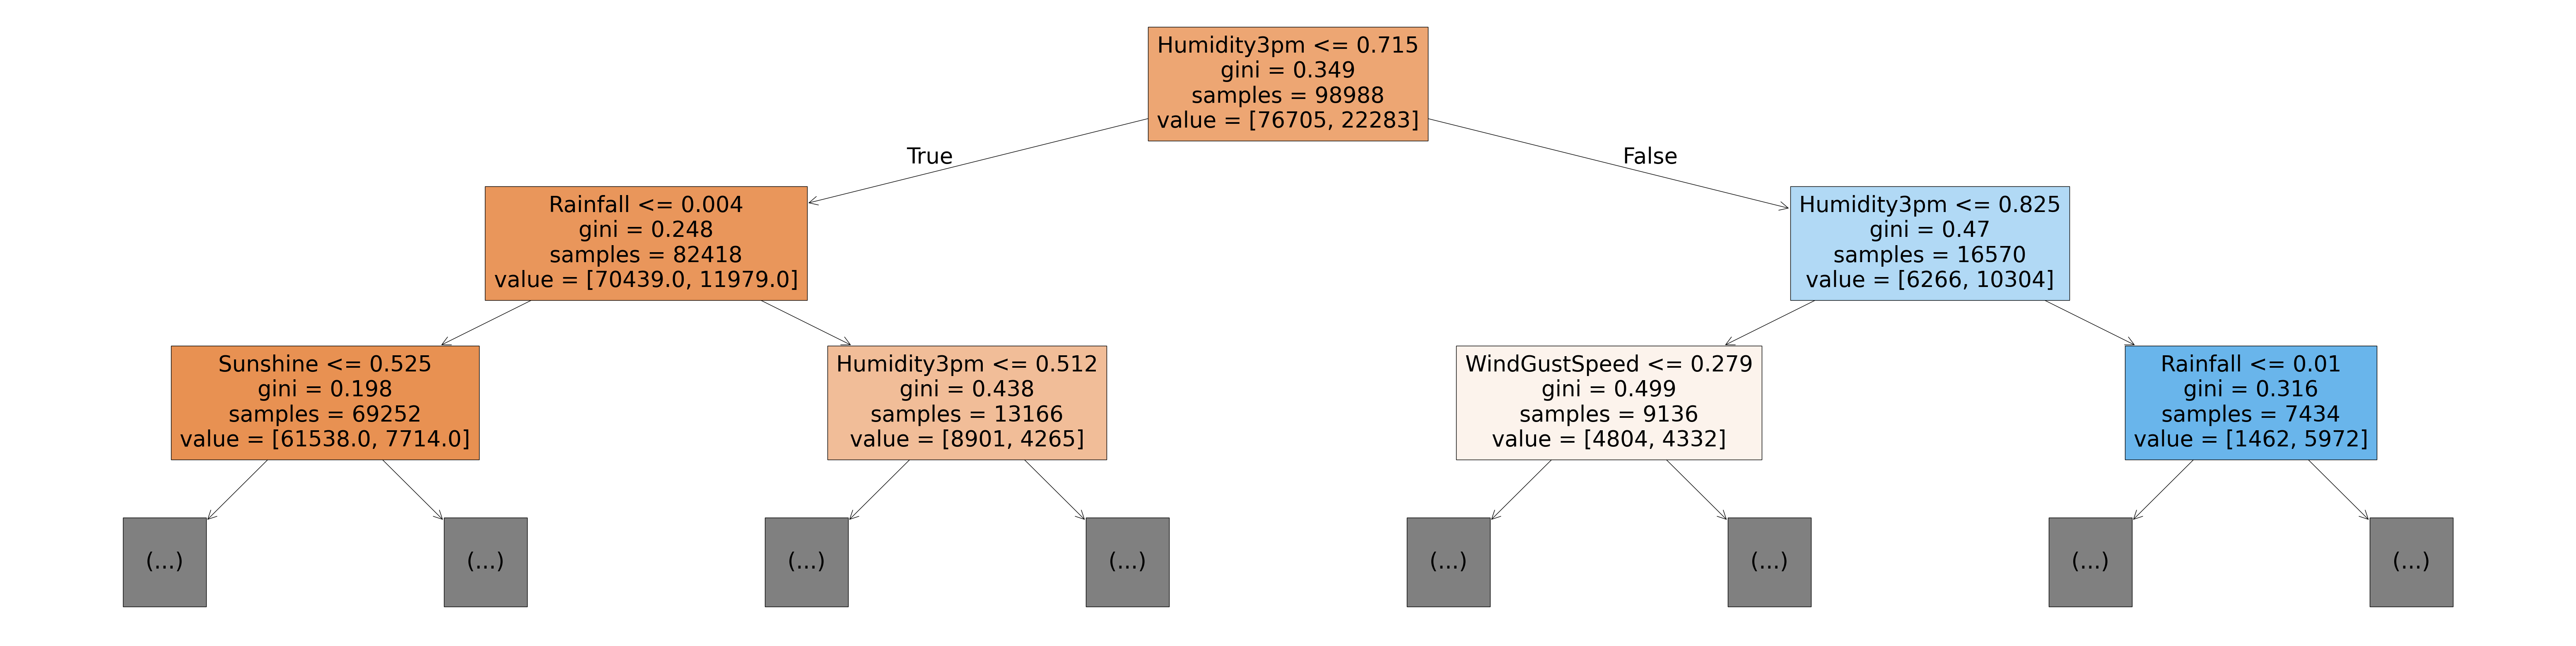

In [43]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=x_train.columns,max_depth=2,filled=True)

In [44]:
# model.feature_importances_

## hyperparamter tuning

* to reduce overfitting we use regularization
* reference -> https://jovian.ai/aakashns/sklearn-decision-trees-random-forests#C54

In [46]:
# we need to tune the max_depth,leaf node and other hyperparameters
# for avoiding overfitting
model1=DecisionTreeClassifier(max_depth=7,random_state=42).fit(x_train,train_target)
model1.score(x_val,val_target)

0.8453949277465034

so we could see that accuarcy on the val set increased to 84.5% from 79%

# RandomForest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_jobs=-1).fit(x_train,train_target)

n_jobs helps to use multiple decision tree  parallely to train the model

evaluating the model on training set

In [48]:
model2.score(x_train,train_target)

0.9999595910615429

evaluating model in validation set

In [49]:
model2.score(x_val,val_target)

0.8541582032383495

accuracy is higher than the decision tree

In [50]:
print(model2.predict_proba(x_val))

[[0.98 0.02]
 [0.81 0.19]
 [0.95 0.05]
 ...
 [0.96 0.04]
 [0.92 0.08]
 [0.93 0.07]]


we do have a probability available in decision tree and random forest where you can see the probability of the dependent feautres based on the independent feature
* like u can take for example the first row where of no rain probability is 98% and for rain its 2% based on our model

## Hyperparameter Tuning

lets use entropy as loss function to see the difference

In [58]:
model3=RandomForestClassifier(criterion='entropy',n_jobs=-1,random_state=42).fit(x_train,train_target)

In [60]:
model3.score(x_val,val_target)

0.8573501247751146

lets use n_estimators which is the number of decision tree used default value is 100

In [53]:
model4=RandomForestClassifier(criterion='entropy',n_jobs=-1,n_estimators=200).fit(x_train,train_target)

In [54]:
model4.score(x_val,val_target)

0.8578144042713713

using `max_depth` and `max_leaf_nodes`

In [ ]:
# we could use max_depth and max_leaf_nodes and check for the optimum

we can use max_feature like log2

In [57]:
model5=RandomForestClassifier(criterion='entropy',n_jobs=-1,max_features='log2',random_state=42).fit(x_train,train_target)

In [59]:
model5.score(x_val,val_target)

0.8560733561604086

we have min_samples_split and min_sample_leaf
* use reference -> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html